In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import sys
import datetime

### Recompute users, recordings, contractions to new user selection based on corrected sad segment computation

In [4]:
users = pd.read_pickle('./data/users-03.pkl')
recordings = pd.read_pickle('./data/recordings-03.pkl')
contractions = pd.read_pickle('./data/contractions-03.pkl')

### Analyse recordings according to their sad segment percentage

In [40]:
# get sad segment percentage from firebase
conn = psycopg2.connect('postgres://katharina:p07006ba405021f820704990d02f0ebc2b187e05a36cef2b6dabba701c3e81b76@ec2-18-209-187-210.compute-1.amazonaws.com:5432/d18nsc958ia8ph')
ss_percentage = pd.read_sql('''select * 
from katharina.session_quality''', conn)
ss_percentage = ss_percentage.set_index('session_id', drop=False)
#ss_percentage.to_pickle('./data/ss_percentage.pkl')

In [8]:
#recordings have been prefiltered to remove sessions from day before delivery + duration longer than 1hour
#only keep recordings resulting from prefiltering
ss_percentage = ss_percentage[ss_percentage['session_id'].isin(recordings['id'])]

Text(0.5, 0, 'Percentage of sad segments in recording [%]')

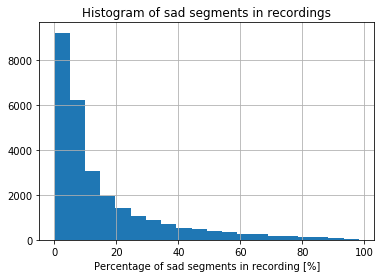

In [9]:
plt = ss_percentage['fract'].hist(bins=20)
plt.set_title('Histogram of sad segments in recordings')
plt.set_xlabel('Percentage of sad segments in recording [%]')

In [10]:
for i in range(1,10):
    q = i/10
    #print('Quantile:', q, 'Value:', np.quantile(ss_percentage['fract'], q), '% sad segments')
    print(q*100, '% der Recordings enthalten weniger als ', np.quantile(ss_percentage['fract'], q), '% sad segments')

10.0 % der Recordings enthalten weniger als  2.006172839506173 % sad segments
20.0 % der Recordings enthalten weniger als  3.195997294727064 % sad segments
30.0 % der Recordings enthalten weniger als  4.429013084587261 % sad segments
40.0 % der Recordings enthalten weniger als  5.942199775435958 % sad segments
50.0 % der Recordings enthalten weniger als  7.986592695330559 % sad segments
60.0 % der Recordings enthalten weniger als  11.201404082755722 % sad segments
70.0 % der Recordings enthalten weniger als  16.370115854273994 % sad segments
80.0 % der Recordings enthalten weniger als  24.971674674476343 % sad segments
90.0 % der Recordings enthalten weniger als  41.25274725274726 % sad segments


### Set quality threshold and store data

In [33]:
quality_threshold = 10 #%
IDs_q = ss_percentage[ss_percentage['fract']<=quality_threshold]
recordings_q = recordings[recordings['id'].isin(IDs_q['session_id'])]

#delete users that have no labor recording
users_labor = set(recordings_q[recordings_q['labor']==1]['user_id'])
recordings_q = recordings_q[recordings_q['user_id'].isin(users_labor)]

#update contractions
contractions_q = contractions[contractions['session_id'].isin(recordings_q['id'])]
users_q = users[users['user_id'].isin(recordings_q['user_id'])]

In [36]:
#store data
users_q.to_pickle('./data/users-04')
recordings_q.to_pickle('./data/recordings-04')
contractions_q.to_pickle('./data/contractions-04')

Ellipsis